In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train_r = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test_r = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])

In [3]:
x_train_r

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

In [5]:
clf = make_pipeline(StandardScaler(), LogisticRegression())
clf.fit(x_train_r, y_train)
from sklearn.metrics import accuracy_score
print(f'Accuracy: {accuracy_score(y_test, [clf.predict(x.reshape(1, -1))[0] for x in x_test_r])*100}%')

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 92.46%


Predicted: 4
Actual: 4


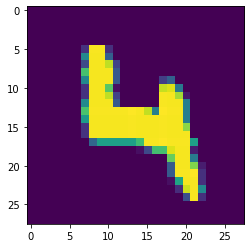

In [6]:
i = np.random.randint(0, x_test_r.shape[0])
print(f'Predicted: {clf.predict(x_test_r[i].reshape(1, -1))[0]}')
print(f'Actual: {y_test[i]}')
plt.imshow(x_test[i]);

In [7]:
lgr1 = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
softmax = make_pipeline(StandardScaler(), lgr1)
softmax.fit(x_train_r, y_train)


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(multi_class='multinomial'))])

In [8]:
from sklearn.metrics import accuracy_score
print(f'Accuracy: {accuracy_score(y_test, [softmax.predict(x.reshape(1, -1))[0] for x in x_test_r])*100}%')

Accuracy: 92.46%


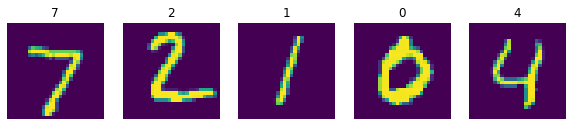

In [9]:
fig, axes = plt.subplots(1, 5, figsize = (10,5))
for img, ax in zip(x_test[:5], axes):
    predicted = softmax.predict(img.reshape(1, -1))[0]
    ax.set_title(predicted)
    ax.imshow(img.reshape((28,28)))
    ax.axis('off')

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [11]:
gaa = LinearDiscriminantAnalysis(n_components = 2)
gaa.fit_transform(x_train_r, y_train)

array([[-0.90459877, -0.63847802],
       [-2.89955639, -3.3132971 ],
       [ 1.96972762,  0.06783832],
       ...,
       [-0.03491826, -0.76497676],
       [-1.31674031, -1.72338222],
       [-1.35364085, -0.84840293]])

In [13]:
from sklearn.metrics import accuracy_score
print(f'Accuracy: {accuracy_score(y_test, [gaa.predict(x.reshape(1, -1))[0] for x in x_test_r])*100}%')

Accuracy: 87.3%


Predicted: 1
Actual: 1


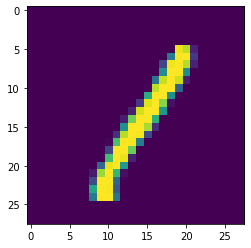

In [14]:
i = np.random.randint(0, x_test_r.shape[0])
print(f'Predicted: {gaa.predict(x_test_r[i].reshape(1, -1))[0]}')
print(f'Actual: {y_test[i]}')
plt.imshow(x_test[i]);

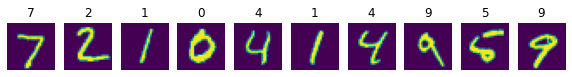

In [15]:
fig, axes = plt.subplots(1, 10, figsize = (10,5))
for img, ax in zip(x_test[:10], axes):
    predicted = gaa.predict(img.reshape(1, -1))[0]
    ax.set_title(predicted)
    ax.imshow(img.reshape((28,28)))
    ax.axis('off')

In [17]:
from sklearn import svm

In [18]:
svc1 = svm.SVC(kernel = 'linear')

In [19]:
model1 = make_pipeline(StandardScaler(), svc1)
model1.fit(x_train_r, y_train)
print(f'Accuracy: {accuracy_score(y_test, [model1.predict(x.reshape(1, -1))[0] for x in x_test_r])*100}%')

Accuracy: 92.93%


Predicted: 4
Actual: 4


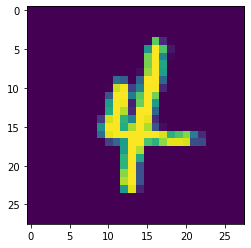

In [24]:
i = np.random.randint(0, x_test_r.shape[0])
print(f'Predicted: {model1.predict(x_test_r[i].reshape(1, -1))[0]}')
print(f'Actual: {y_test[i]}')
plt.imshow(x_test[i]);

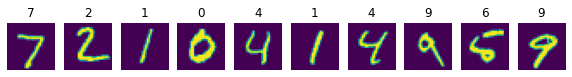

In [25]:
fig, axes = plt.subplots(1, 10, figsize = (10,5))
for img, ax in zip(x_test[:10], axes):
    predicted = model1.predict(img.reshape(1, -1))[0]
    ax.set_title(predicted)
    ax.imshow(img.reshape((28,28)))
    ax.axis('off')

In [26]:
svc2 = svm.SVC(kernel = 'rbf')

In [23]:
model2 = make_pipeline(StandardScaler(), svc2)
model2.fit(x_train_r, y_train)
print(f'Accuracy: {accuracy_score(y_test, [model2.predict(x.reshape(1, -1))[0] for x in x_test_r])*100}%')

Accuracy: 96.6%


Predicted: 7
Actual: 7


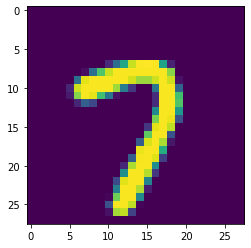

In [27]:
i = np.random.randint(0, x_test_r.shape[0])
print(f'Predicted: {model2.predict(x_test_r[i].reshape(1, -1))[0]}')
print(f'Actual: {y_test[i]}')
plt.imshow(x_test[i]);

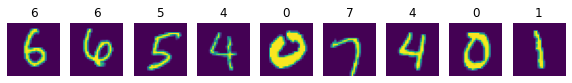

In [32]:
fig, axes = plt.subplots(1, 9, figsize = (10,5))
for img, ax in zip(x_test[21:30], axes):
    predicted = model1.predict(img.reshape(1, -1))[0]
    ax.set_title(predicted)
    ax.imshow(img.reshape((28,28)))
    ax.axis('off')